In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [3]:
trans_data = spark.read.csv('D:/Code_Place/Data-Science/Scikit Learn/trasport/ts_transport_fitness_01_03_2022to31_03_2022.csv', inferSchema=True, header=True)
trans_data.printSchema()

root
 |-- slno: integer (nullable = true)
 |-- registrationNo: string (nullable = true)
 |-- vehicleClass: string (nullable = true)
 |-- status: string (nullable = true)
 |-- validFrom: string (nullable = true)
 |-- validTo: string (nullable = true)
 |-- transactiontType: string (nullable = true)
 |-- OfficeCd: string (nullable = true)
 |-- fromdate: string (nullable = true)
 |-- todate: string (nullable = true)



In [4]:
trans_data.count()

76657

In [6]:
trans_data.head(5)

[Row(slno=770352, registrationNo='TS07UC8621', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2023', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=500609, registrationNo='TS01UC2799', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2024', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=530243, registrationNo='TS01UA7497', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2024', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=16716, registrationNo='AP01V3757', vehicleClass='Trailer For Commercial Use', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2023', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=34122, registrat

In [21]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

+-------------------+-------------------+
|      skewness(_c0)|      kurtosis(_c0)|
+-------------------+-------------------+
|-0.3511757043707716|-1.0309084999246485|
+-------------------+-------------------+



In [7]:
trans_data.describe().show()

+-------+------------------+--------------+--------------------+--------+----------+----------+----------------+-----------------+----------+----------+
|summary|              slno|registrationNo|        vehicleClass|  status| validFrom|   validTo|transactiontType|         OfficeCd|  fromdate|    todate|
+-------+------------------+--------------+--------------------+--------+----------+----------+----------------+-----------------+----------+----------+
|  count|             76657|         76657|               76657|   76657|     76657|     76657|           76657|            76657|     76657|     76657|
|   mean| 713451.5525000979|          null|                null|    null|      null|      null|            null|             null|      null|      null|
| stddev|361718.45413726586|          null|                null|    null|      null|      null|            null|             null|      null|      null|
|    min|                90|       AAI3151|           Ambulance|APPROVED|01/02/202

In [8]:
from email import header
import numpy as np
import pandas as pd
from sqlalchemy import false
import tensorflow as tf

df_main = trans_data.toPandas()
df_main.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,TS07UC8621,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
1,500609,TS01UC2799,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
2,530243,TS01UA7497,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
3,16716,AP01V3757,Trailer For Commercial Use,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
4,34122,AP01W8405,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022


In [9]:
df = df_main.copy()
col_list = df.columns
print(col_list)

Index(['slno', 'registrationNo', 'vehicleClass', 'status', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd', 'fromdate', 'todate'],
      dtype='object')


In [10]:
df.replace(np.nan,0)


,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,TS07UC8621,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
1,500609,TS01UC2799,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
2,530243,TS01UA7497,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
3,16716,AP01V3757,Trailer For Commercial Use,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
4,34122,AP01W8405,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
...,...,...,...,...,...,...,...,...,...,...
76652,65180,AP10U5158,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76653,66091,AP11T3969,Goods Carriage,APPROVED,31/03/2022,30/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76654,69196,AP10V5554,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76655,66901,AP09U5575,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022


In [11]:
df.dtypes

slno                 int32
registrationNo      object
vehicleClass        object
status              object
validFrom           object
validTo             object
transactiontType    object
OfficeCd            object
fromdate            object
todate              object
dtype: object

In [46]:
df['registrationNo']

0        TS07UC8621
1        TS01UC2799
2        TS01UA7497
3         AP01V3757
4         AP01W8405
            ...    
76652     AP10U5158
76653     AP11T3969
76654     AP10V5554
76655     AP09U5575
76656    AP03TC1964
Name: registrationNo, Length: 76657, dtype: object

In [12]:
df['status'] = pd.Categorical(df['status'])
df['status'] = df.status.cat.codes
df['vehicleClass'] = pd.Categorical(df['vehicleClass'])
df['vehicleClass'] = df.vehicleClass.cat.codes
df['registrationNo'] = pd.Categorical(df['registrationNo'])
df['registrationNo'] = df.registrationNo.cat.codes
df['transactiontType'] = pd.Categorical(df['transactiontType'])
df['transactiontType'] = df.transactiontType.cat.codes
df['OfficeCd'] = pd.Categorical(df['OfficeCd'])
df['OfficeCd'] = df.OfficeCd.cat.codes
df['validFrom'] = pd.Categorical(df['validFrom'])
df['validFrom'] = df.validFrom.cat.codes
df['validTo'] = pd.Categorical(df['validTo'])
df['validTo'] = df.validTo.cat.codes

df.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,18563,12,0,10,2,4,0,01/03/2022,02/03/2022
1,500609,13019,12,0,10,3,4,0,01/03/2022,02/03/2022
2,530243,12715,12,0,10,3,4,0,01/03/2022,02/03/2022
3,16716,151,27,0,10,2,4,0,01/03/2022,02/03/2022
4,34122,257,12,0,10,2,4,0,01/03/2022,02/03/2022


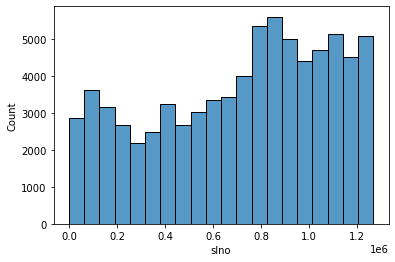

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="slno", bins=20)
plt.show()

array([[<AxesSubplot:title={'center':'slno'}>,
        <AxesSubplot:title={'center':'registrationNo'}>],
       [<AxesSubplot:title={'center':'status'}>, <AxesSubplot:>]],
      dtype=object)

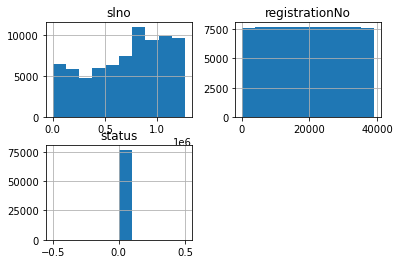

In [14]:
# # sns.heatmap(trans_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# sns.countplot(data=trans_data)
clist = ['slno', 'registrationNo', 'status']
df_hist = df[clist]
df_hist.hist()


In [15]:
numaric_call = ['slno', 'registrationNo', 'vehicleClass', 'status', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd']
data = df[numaric_call]
data.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd
0,770352,18563,12,0,10,2,4,0
1,500609,13019,12,0,10,3,4,0
2,530243,12715,12,0,10,3,4,0
3,16716,151,27,0,10,2,4,0
4,34122,257,12,0,10,2,4,0


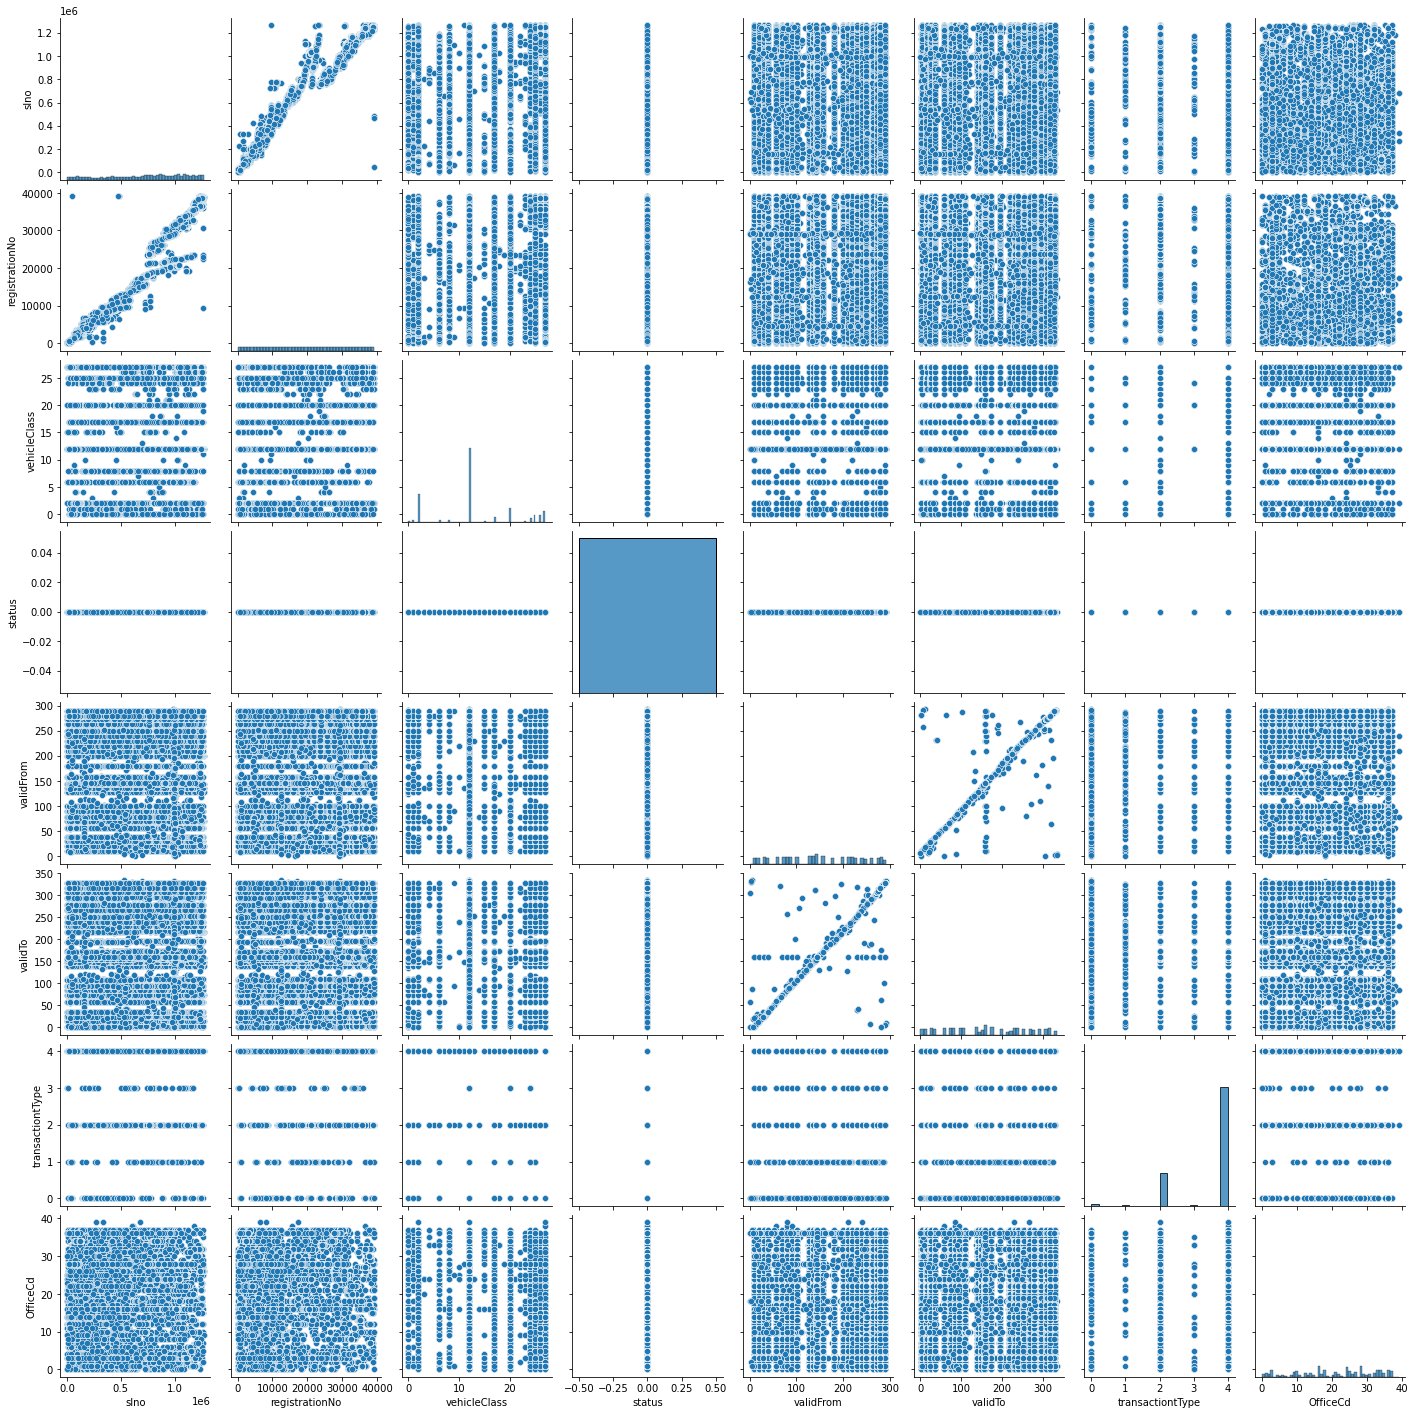

In [16]:
sns.pairplot(data=data)

In [21]:
dataset = data.copy()
train_dataset = dataset.sample(frac=0.75, random_state=1)
len(train_dataset)


57493

In [22]:
test_dataset = dataset.drop(train_dataset.index)
len(test_dataset)

19164

In [23]:
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [24]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

c:\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


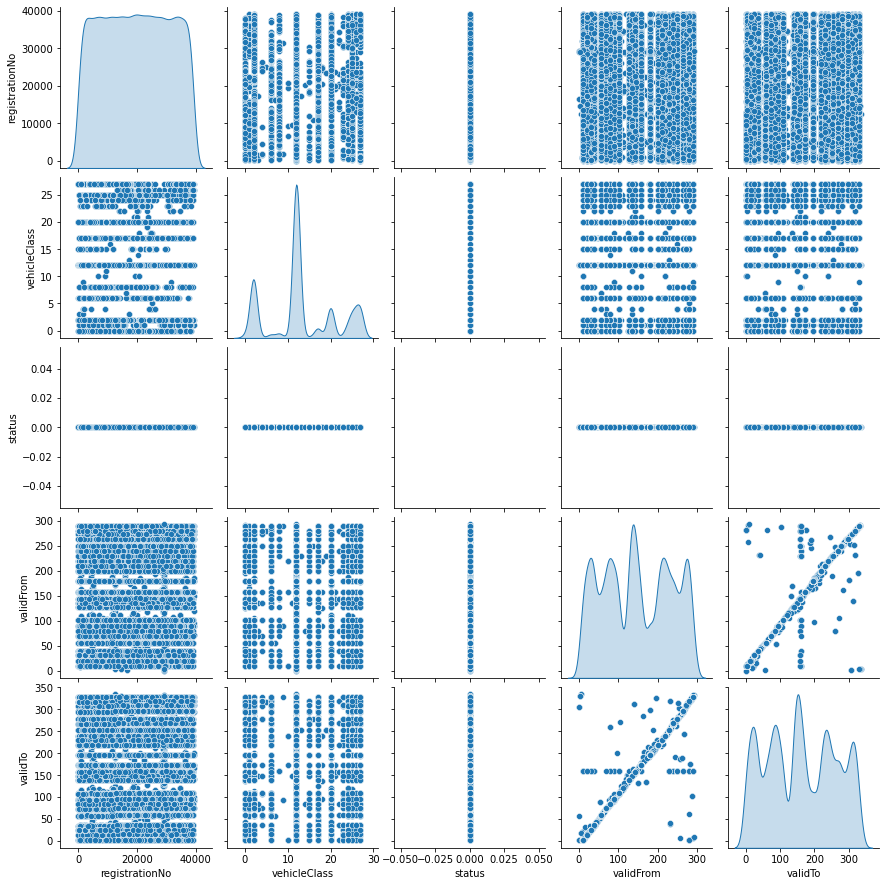

In [26]:
sns.pairplot(train_dataset.iloc[:, 1:6], diag_kind='kde');

In [67]:
from sklearn.preprocessing import OneHotEncoder
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)


MemoryError: Unable to allocate 22.8 GiB for an array with shape (76657, 39844) and data type float64

In [60]:
from __future__ import print_function
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# There are n columns in the feature matrix
# after One Hot Encoding.
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))

# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
					logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
		learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


tf


Instructions for updating:
non-resource variables are not supported in the long term


<module 'tensorflow.compat.v1' from 'c:\\python\\lib\\site-packages\\tensorflow\\_api\\v2\\compat\\v1\\__init__.py'>

In [61]:
# Starting the Tensorflow Session
with tf.Session() as sess:
	
	# Initializing the Variables
	sess.run(init)
	
	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []
	
	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0
		
		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X : x, Y : y})
		
		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X : x, Y : y})
		
		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
										tf.argmax(Y, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction,
												tf.float32))
		
		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
		
		# Displaying result on current Epoch
		if epoch % 100 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1]))
	
	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias
	
	# Final Accuracy
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
									tf.argmax(Y, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,
											tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")


MemoryError: Unable to allocate 11.4 GiB for an array with shape (76657, 39844) and data type float32